In [1]:
using Pkg
pkg"activate ."
pkg"instantiate"

 Activating environment at `~/Documents/otimizacao-em-julia/notebooks/Project.toml`


In [2]:
using Plots, Interact, LinearAlgebra, ForwardDiff
gr(size=(600,400))
contour(1:10, 1:10, atan)
nothing

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-1755569460129423072\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-917612319490547812\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-1755569460129423072\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

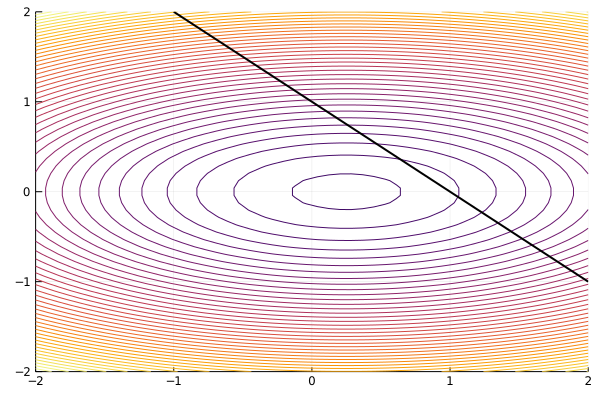

In [47]:
xg = range(-2, 2, length=50)
yg = range(-2, 2, length=50)

f(x) = x[1]^2 + 4 * x[2]^2 - x[1] / 2
f(x,y) = f([x;y])
# c(x) = [x[1]^2 + x[2]^2 - 1]
c(x) = [x[1] + x[2] - 1]
c(x,y) = c([x;y])[1]

contour(xg, yg, f, leg=false, levels=50)
contour!(xg, yg, c, levels=[0.0], lw=2, c=:black)

In [48]:
using ForwardDiff
FD = ForwardDiff

∇f(x) = FD.gradient(f, x)
L(x,y) = f(x) + dot(y, c(x))
B(x,y) = FD.hessian(x -> L(x, y), x)
J(x) = FD.jacobian(c, x)

J (generic function with 1 method)

In [49]:
Bx

2×2 Array{Float64,2}:
 0.5  0.0
 0.0  6.5

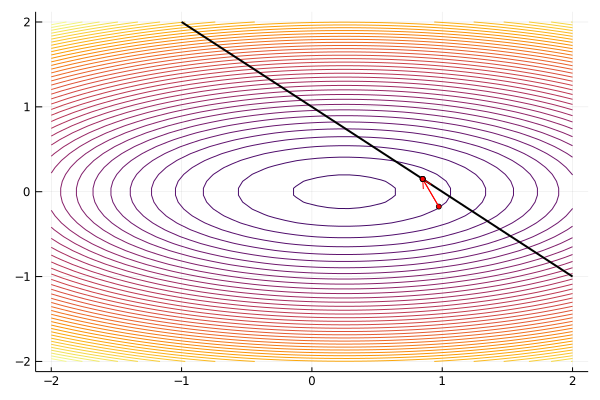

In [50]:
x = [1; 0] + 0.3 * randn(2)
y = randn(1)

p = contour(xg, yg, f, leg=false, levels=50)
contour!(xg, yg, c, levels=[0.0], lw=2, c=:black)

for k = 1:5
    scatter!([x[1]], [x[2]], c=:red, ms=3)

    Bx = B(x,y)
    gx = ∇f(x)
    cx = c(x)
    Ax = J(x)
    K = [Bx  Ax';  Ax  0.0]
    rhs = [gx + Ax' * y; cx]
    Δxy = -K \ rhs
    Δx = Δxy[1:2]
    Δy = Δxy[3:3]
    plot!(x[1] .+ [0, Δx[1]], x[2] .+ [0, Δx[2]], c=:red, l=:arrow)
    x += Δx
    y += Δy
end
p

In [52]:
using LinearAlgebra

@manipulate for η = range(1.0, 100.0, length=50)
    y(x) = -(J(x) * J(x)') \ (J(x) * ∇f(x))
    ϕ(x) = f(x) + dot(y(x), c(x)) + η * (c(x)[1])^2 / 2
    ϕ(x,y) = ϕ([x;y])
    p = contour(xg, yg, ϕ, leg=false, levels=200)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["η"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 50,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
25, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/abel/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/abel/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/abel/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/home/abel/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/home/abel/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fe83239d120, Task (runnable) @0x00007fe83239d120), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1.0\",\"3.02041\",\"5.04082\",\"7.06122\",\"9.08163\",\"11.102\",\"13.1224\",\"15.1429\",\"17.1633\",\"19.1837\",\"21.2041\",\"23.2245\",\"25.2449\",\"27.2653\",\"29.2857\",\"31.3061\",\"33.3265\",\"35.3469\",\"37.3673\",\"39.3878\",\"41.4082\",\"43.4286\",\

In [63]:
using LinearAlgebra

xg = range(0.5, 1.5, length=50)
yg = range(-0.5, 1.5, length=50)
f(x) = 2 * (x[1]^2 + x[2]^2 - 1) - x[1]
c(x) = [x[1]^2 + x[2]^2 - 1]
η = 1.0
ϕ(x) = f(x) + η * norm(c(x))^2 / 2
@manipulate for θ = range(0.0, π / 4, length=50),
                t = range(1.0, 0.1, length=50)
    p = contour(xg, yg, f, leg=false, levels=100)
    contour!(xg, yg, c, levels=[0.0], lw=2, c=:black)
    x = [cos(θ); sin(θ)]
    d = t * [sin(θ)^2; -sin(θ) * cos(θ)]
    slope = dot(d, ∇f(x) + η * J(x)' * c(x))
    plot!(x[1] .+ [0, d[1]], x[2] .+ [0, d[2]], c=:red, l=:arrow, m=(2))
    title!("slope = $(round(slope, digits=3)), $(round(ϕ(x), digits=3)), $(round(ϕ(x + d), digits=3))")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 50,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
25, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/abel/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/abel/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/abel/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/home/abel/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/home/abel/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fe831bc9870, Task (runnable) @0x00007fe831bc9870), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.0160285\",\"0.0320571\",\"0.0480856\",\"0.0641141\",\"0.0801427\",\"0.0961712\",\"0.1122\",\"0.128228\",\"0.144257\",\"0.160285\",\"0.176314\",\"0.192342\",\"0.208371\",\"0.224399\",\"0.240428\",\"0.256457\",\"0.272485\",\"0.288514\",\"0.304542\",\